In [1]:
%pip install sklearn
%pip install quandl
%pip install openpyxl
%pip install keras


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [110]:
import math
import requests
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import os
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import quandl
import pandas as pd
from openpyxl import load_workbook
import yfinance as yf
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import seaborn as sns
import sklearn
from sklearn.metrics import r2_score

In [20]:
oil_prod_xl = os.path.abspath('data/oil_prod.xlsx')
oil_prod = pd.read_excel(oil_prod_xl) 
oilprod_grouped_country = oil_prod.groupby(by="Entity")["Oil production (TWh)"].sum()
oil_prod_nation_final = pd.DataFrame(oilprod_grouped_country)
oilprod_grouped_year = oil_prod.groupby(by="Year")["Oil production (TWh)"].sum()
oil_prod_final = pd.DataFrame(oilprod_grouped_year)

In [21]:
oil_cons_xl = os.path.abspath('data/oil_cons.xlsx')
oil_cons = pd.read_excel(oil_cons_xl) 
oil_cons_year = oil_cons.groupby(by="Year")["Oil Consumption - Barrels"].sum()
df_oilcons = pd.DataFrame(oil_cons_year)
conversion_factor = 1.6994444444444E-6
df_oilcons['Oil consumption (TWh)'] = df_oilcons['Oil Consumption - Barrels']*conversion_factor
df_oilcons_plot = df_oilcons[df_oilcons.index >= 1960]

In [22]:
oil_cons_csv = os.path.abspath('data/oil_cons_accurate.csv')
oil_cons_acc = pd.read_csv(oil_cons_csv) 
oil_cons_year_acc = oil_cons_acc.groupby(by="Year")["Oil Consumption - TWh"].sum()
df_oilcons_acc = pd.DataFrame(oil_cons_year_acc)

In [23]:
def month(x):
    months = {
        'jan': '01',
        'feb': '02',
        'mar': '03',
        'apr':'04',
         'may':'05',
         'jun':'06',
         'jul':'07',
         'aug':'08',
         'sep':'09',
         'oct':'10',
         'nov':'11',
         'dec':'12'
        }
    a = x.strip()[:3].lower()
    try:
        ez = months[a]
    except:
        raise ValueError('Not a month')
    finally:
        return ez


url_oil_price = 'https://www.eia.gov/dnav/pet/hist/leafHandler.ashx?n=pet&s=f000000__3&f=m'
table = pd.read_html(url_oil_price)
print(f'Total tables equal to {len(table)}')
oil_price = table[4]
oilprice_df = list()
for index in oil_price.index:
    for col in oil_price.columns:
        if str(oil_price[col][index]) == 'NaN' or str(oil_price[col][index]) == 'nan':
            continue
        elif col == 'Year':
            year = str(int(oil_price[col][index]))
        else:
            date = year +  '-' + str(month(col))
            oil_price[col][index]
            df_tuple = (date, oil_price[col][index])
            oilprice_df.append(df_tuple)
oil_price_df = pd.DataFrame(oilprice_df, columns = ['Date', 'USD per Barrel'])
oil_price_df.set_index('Date', inplace = True)

Total tables equal to 9


In [24]:
oil_price.set_index('Year', inplace = True)
oil_price['Avg price'] = oil_price.mean(1)
oil_price['Min'] = oil_price.min(1)
oil_price['Max'] = oil_price.max(1)
oil_price['Median'] = oil_price.median(1)
oil_price['std'] = oil_price.std(1)
oil_price['sem'] = oil_price.sem(1)
oil_price.dropna(inplace = True)
oil_price_df_avg = pd.DataFrame(oil_price)
oil_price_df_avg.tail()

Jan    Feb     Mar     Apr     May     Jun     Jul    Aug    Sep  \
Year                                                                         
2019.0  48.00  52.60   57.46   63.00   59.73   54.34   56.47  53.63  55.14   
2020.0  56.55  49.66   31.01   15.18   18.02   33.81   37.44  39.37  36.82   
2021.0  49.47  56.44   60.43   59.87   62.80   68.58   70.12  65.68  69.09   
2022.0  80.33  89.41  107.07  103.34  108.29  113.77  100.84  93.76  84.62   
2023.0  75.71  74.32   72.09   77.22   70.14   68.58   74.05  79.78  87.96   

          Oct    Nov    Dec  Avg price    Min     Max  Median        std  \
Year                                                                       
2019.0  53.14  54.96  58.41  55.573333  48.00   63.00   55.14   4.285633   
2020.0  36.39  38.25  43.92  36.368333  15.18   56.55   36.82  12.469143   
2021.0  78.51  76.45  70.56  65.666667  49.47   78.51   65.68   8.901336   
2022.0  86.61  84.43  76.45  94.076667  76.45  113.77   93.76  12.512518   
2023.0  84.65  77.45  71.00  76.079167  68.58   87.96   75.71   6.156747   

             sem  
Year              
2019.0  3.178338  
2020.0  3.247288  
2021.0  3.929057  
2022.0  5.631655  
2023.0  4.373717

In [25]:
excel_file = os.path.abspath('data/oil_country.xlsx')
all_sheets_df = pd.read_excel(excel_file, na_values = "Missing",
                                                    sheet_name = None)
df_oil_cons = all_sheets_df['Oil Consumption - Barrels']
df_oil_prod = all_sheets_df['Oil Production - Barrels']


In [26]:
df_oil_prod.dropna(inplace = True) 
df_oil_prod.columns = df_oil_prod.iloc[0]
df_oil_prod.drop(index = 1, inplace = True)
df_oil_prod.set_index('Thousand barrels daily', inplace = True)

In [27]:
df_oil_cons.dropna(inplace = True) 
df_oil_cons.columns = df_oil_cons.iloc[0]
df_oil_cons.drop(index = 1, inplace = True)
df_oil_cons.set_index('Thousand barrels daily', inplace = True)

In [28]:
df_oil_cons_clean = df_oil_cons.transpose()
df_oil_cons_percentages_change = df_oil_cons_clean.tail(3)
df_oil_cons__country_new = df_oil_cons_clean[:-3]
df_oil_cons__country_new.index = df_oil_cons__country_new.index.astype(int)

In [29]:
oil_cons_totals = pd.DataFrame()
oil_cons_by_country = pd.DataFrame()
for col in df_oil_cons_clean:
    if 'Total' in col:
        oil_cons_totals[col] = df_oil_cons_clean[col]
        
    else :
        oil_cons_by_country[col] = df_oil_cons_clean[col]
df_oil_cons_totals_percentages_change = oil_cons_totals.tail(3)
df_oil_cons__totals_new = oil_cons_totals[:-3]
df_oil_cons__totals_new.index = df_oil_cons__totals_new.index.astype(int)
df_oil_cons__totals_new.drop(['Total World'], axis=1, inplace = True)

C:\Users\spyro\AppData\Local\Temp\ipykernel_79072\472561377.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oil_cons__totals_new.drop(['Total World'], axis=1, inplace = True)


In [30]:
oil_cons_totals.index.names = ['Year']
oil_cons_by_country.index.names = ['Year']
oil_cons_bycountry_percentages_change = oil_cons_by_country.tail(3)
oil_cons_by_country = oil_cons_by_country[:-3]


In [31]:
df_oil_prod_clean = df_oil_prod.transpose()
df_oil_prod_percentages_change = df_oil_prod_clean.tail(3)
df_oil_prod__country_new = df_oil_prod_clean[:-3]
df_oil_prod__country_new.index = df_oil_prod__country_new.index.astype(int)

In [32]:
oil_prod_totals = pd.DataFrame()
oil_prod_by_country = pd.DataFrame()
for col in df_oil_prod_clean:
    if 'Total' in col:
        oil_prod_totals[col] = df_oil_prod_clean[col]
        
    else :
        oil_prod_by_country[col] = df_oil_prod_clean[col]
df_oil_prod_totals_percentages_change = oil_prod_totals.tail(3)
df_oil_prod__totals_new = oil_prod_totals[:-3]
df_oil_prod__totals_new.index = df_oil_prod__totals_new.index.astype(int)
df_oil_prod__totals_new.drop(['Total World'], axis=1, inplace = True)

C:\Users\spyro\AppData\Local\Temp\ipykernel_79072\2114437035.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oil_prod__totals_new.drop(['Total World'], axis=1, inplace = True)


In [33]:
oil_prod_totals.index.names = ['Year']
oil_prod_by_country.index.names = ['Year']
oil_prod_bycountry_percentages_change = oil_prod_by_country.tail(3)
oil_prod_by_country = oil_prod_by_country[:-3]
oil_prod_by_country.index = oil_prod_by_country.index.astype("str")


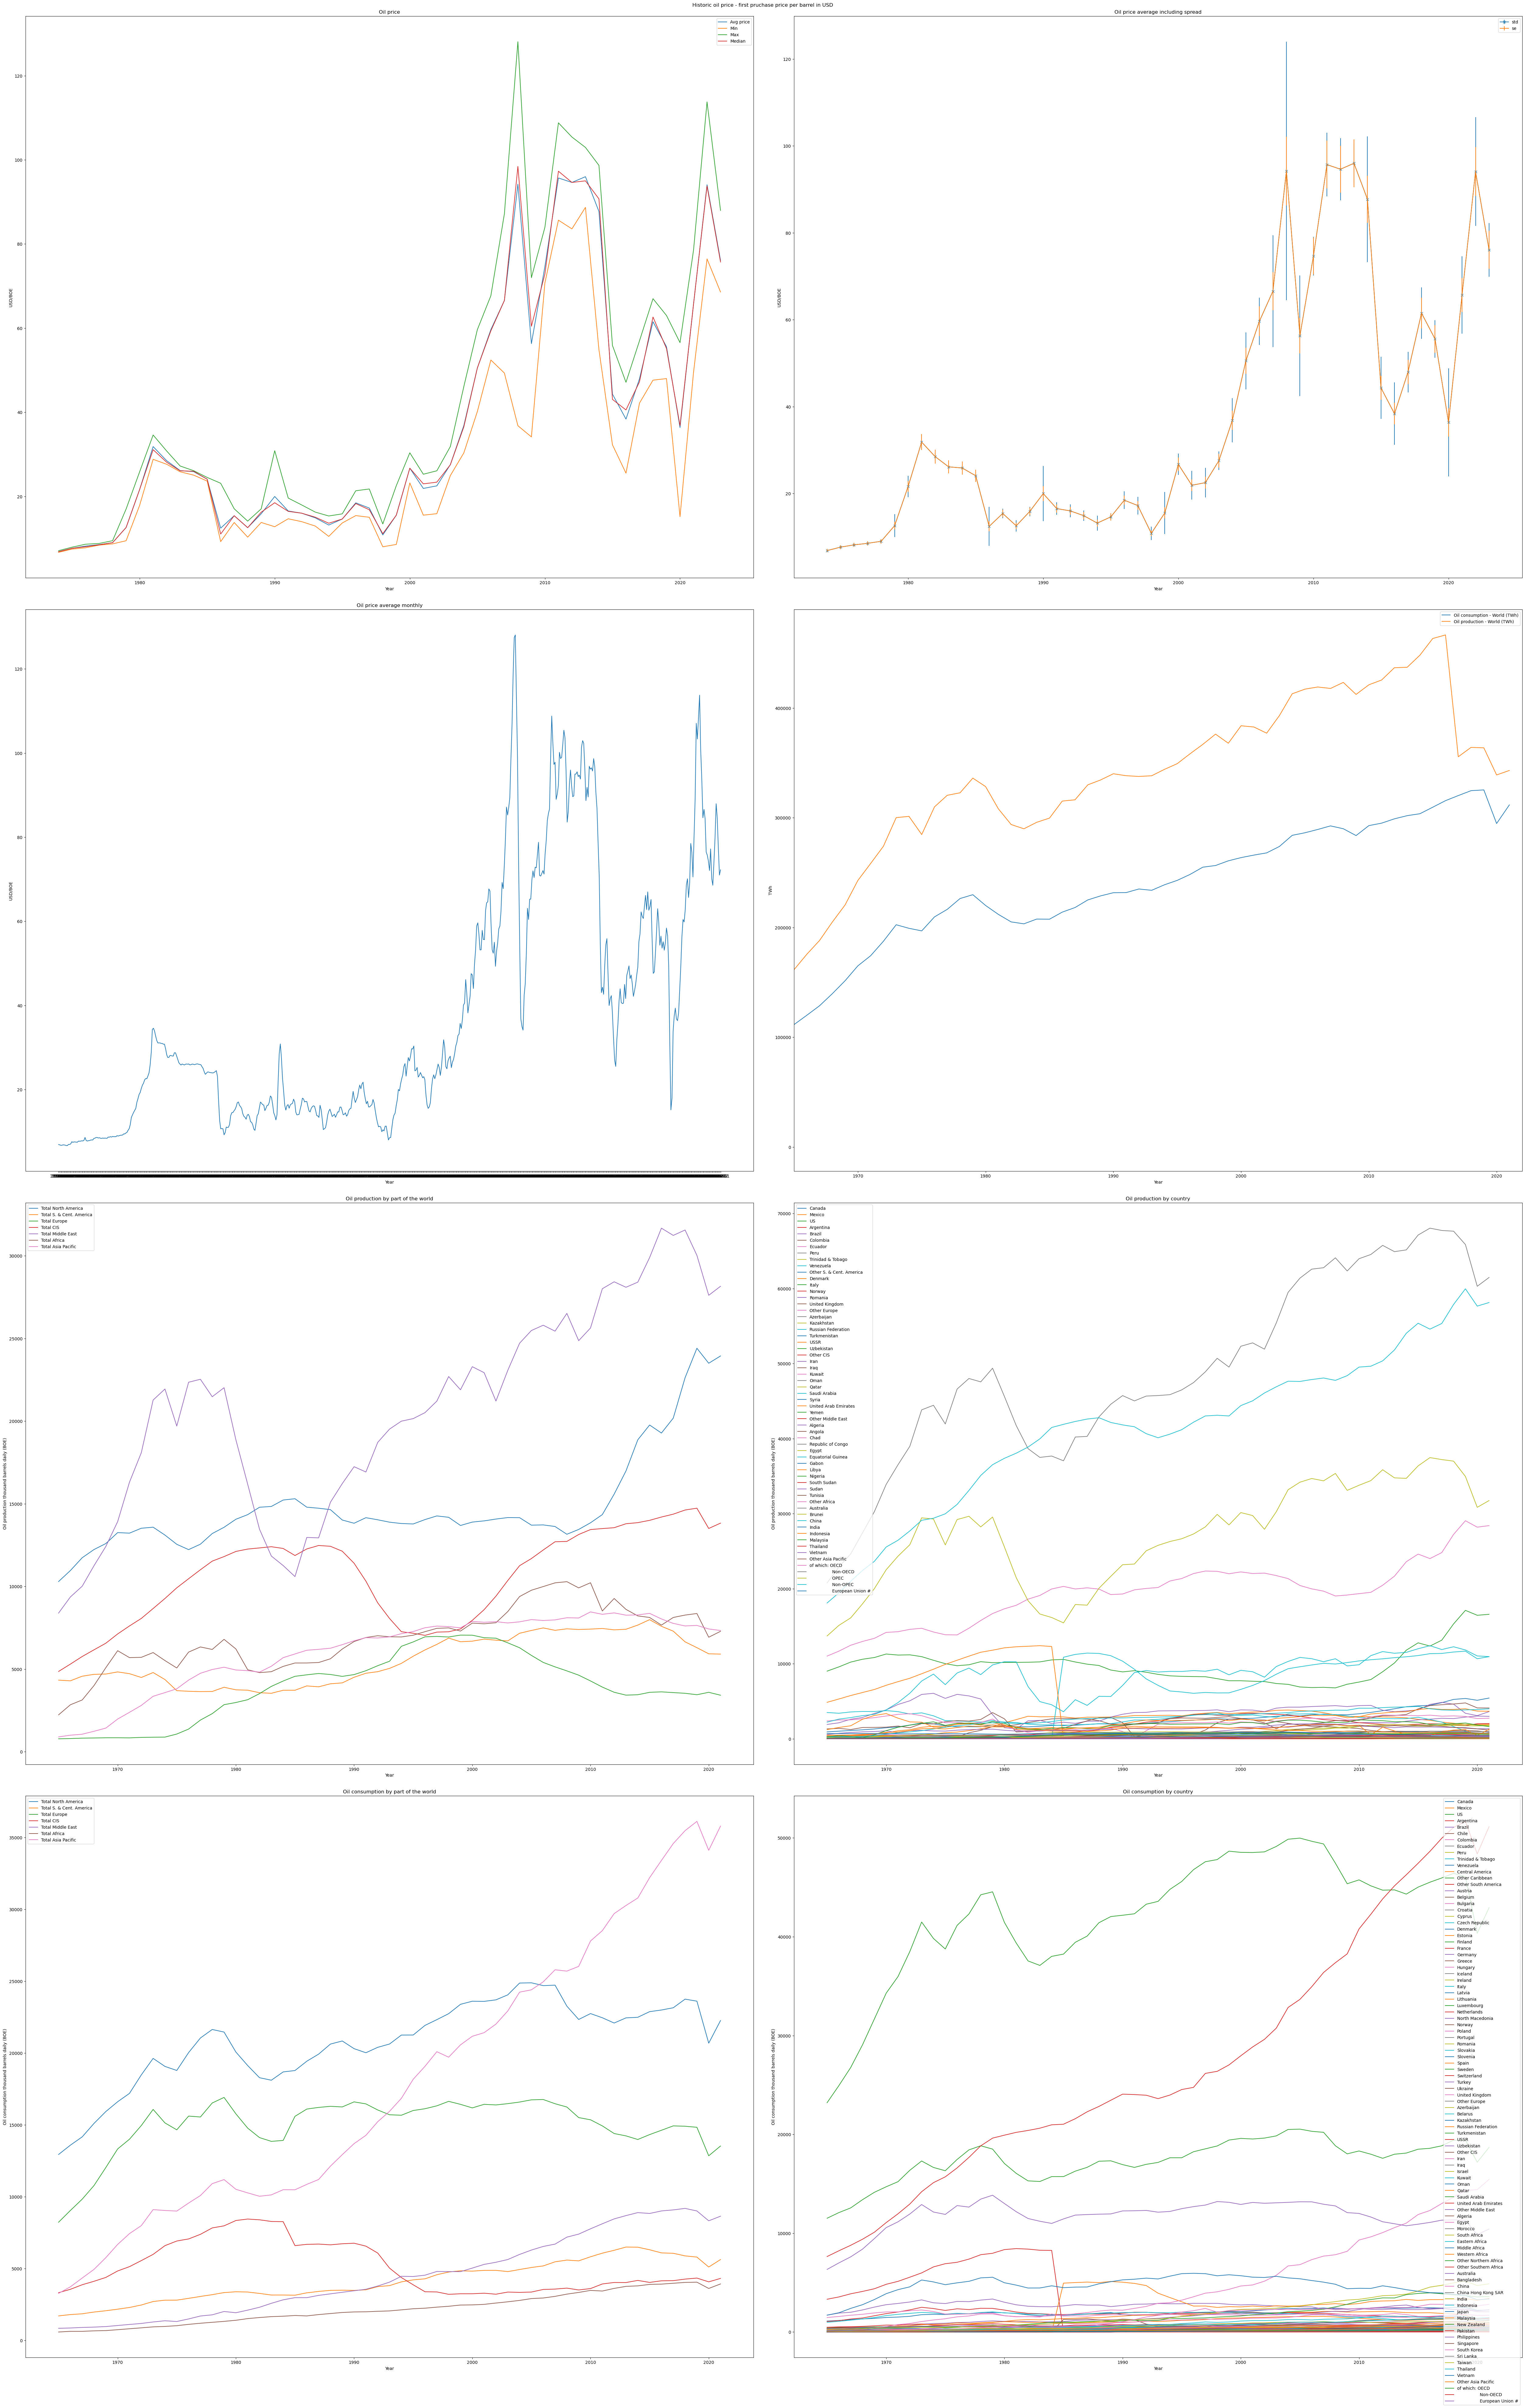

In [34]:
fig1, axs = plt.subplots(nrows = 4, ncols = 2, constrained_layout = True, figsize=(50,80))
(ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)= axs
fig1.suptitle('Historic oil price - first pruchase price per barrel in USD')

ax1.plot(oil_price_df_avg.index, oil_price_df_avg['Avg price'], label='Avg price')
ax1.plot(oil_price_df_avg.index, oil_price_df_avg['Min'], label='Min')
ax1.plot(oil_price_df_avg.index, oil_price_df_avg['Max'], label='Max')
ax1.plot(oil_price_df_avg.index, oil_price_df_avg['Median'], label='Median')
ax1.legend()
ax1.set_ylabel('USD/BOE')
ax1.set_xlabel('Year')
ax1.set_title('Oil price')

ax2.errorbar(oil_price_df_avg.index, oil_price_df_avg['Avg price'], oil_price_df_avg['std'], marker = 'x', label = 'std')
ax2.errorbar(oil_price_df_avg.index, oil_price_df_avg['Avg price'],oil_price_df_avg['sem'], label='se')
ax2.legend()
ax2.set_ylabel('USD/BOE')
ax2.set_xlabel('Year')
ax2.set_title('Oil price average including spread')

ax3.plot(oil_price_df.index, oil_price_df['USD per Barrel'], label = 'std')
ax3.set_ylabel('USD/BOE')
ax3.set_xlabel('Year')
ax3.set_title('Oil price average monthly')

ax4.plot(df_oilcons_acc.index, df_oilcons_acc["Oil Consumption - TWh"], label = 'Oil consumption - World (TWh)')
ax4.plot(oil_prod_final.index, oil_prod_final["Oil production (TWh)"], label = "Oil production - World (TWh)")
ax4.set_xlabel('Year')
ax4.set_ylabel('TWh')
ax4.set_xlim(1965,2022)
ax4.legend()

for col in df_oil_prod__totals_new.columns: 
    ax5.plot(df_oil_prod__totals_new.index, df_oil_prod__totals_new[col], label = col) 
    ax5.set_xlabel('Year')
    ax5.set_ylabel('Oil production thousand barrels daily (BOE)')
    ax5.set_title('Oil production by part of the world')
    ax5.legend()

for col in oil_prod_by_country.columns: 
    ax6.plot(np.array(np.array(oil_prod_by_country.index, dtype = 'float'), dtype = 'int'), oil_prod_by_country[col], label = col) 
    ax6.set_xlabel('Year')
    ax6.set_ylabel('Oil production thousand barrels daily (BOE)')
    ax6.set_title('Oil production by country')
    ax6.legend()

for col in df_oil_cons__totals_new.columns: 
    ax7.plot(df_oil_cons__totals_new.index, df_oil_cons__totals_new[col], label = col) 
    ax7.set_xlabel('Year')
    ax7.set_ylabel('Oil consumption thousand barrels daily (BOE)')
    ax7.set_title('Oil consumption by part of the world')
    ax7.legend()

for col in oil_cons_by_country.columns: 
    ax8.plot(np.array(np.array(oil_cons_by_country.index, dtype = 'float'), dtype = 'int'), oil_cons_by_country[col], label = col) 
    ax8.set_xlabel('Year')
    ax8.set_ylabel('Oil consumption thousand barrels daily (BOE)')
    ax8.set_title('Oil consumption by country')
    ax8.legend()
    
plt.show()

In [94]:
dxy_csv = os.path.abspath('data/dxy_price.csv')
dxy = pd.read_csv(dxy_csv) 
dxy.dropna(inplace = True)

In [36]:

sp500_data = yf.download('^GSPC', start='1927-12-30', end=pd.Timestamp.today())
sp500_data['Close_Pct_Change'] = sp500_data['Close'].pct_change() * 100
sp500_data['Volume'] = sp500_data['Volume'].astype(float)/(1000000)
treasury_10yr_data = yf.download('^TNX', start='1962-01-02', end=pd.Timestamp.today())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [37]:
df_funds= pd.read_csv(os.path.abspath('data/fed-funds-rate-historical-chart.csv'))
df_funds = df_funds[df_funds['date'].notnull()]
df_funds.set_index('date', inplace = True)
df_funds.index = pd.to_datetime(df_funds.index)

C:\Users\spyro\AppData\Local\Temp\ipykernel_79072\2662808000.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_funds.index = pd.to_datetime(df_funds.index)


In [38]:
treasury_10yr_data['Close_Pct_Change'] = treasury_10yr_data['Close'].pct_change() * 100
df_funds['Pct_Change'] = df_funds[' value'].pct_change() * 100

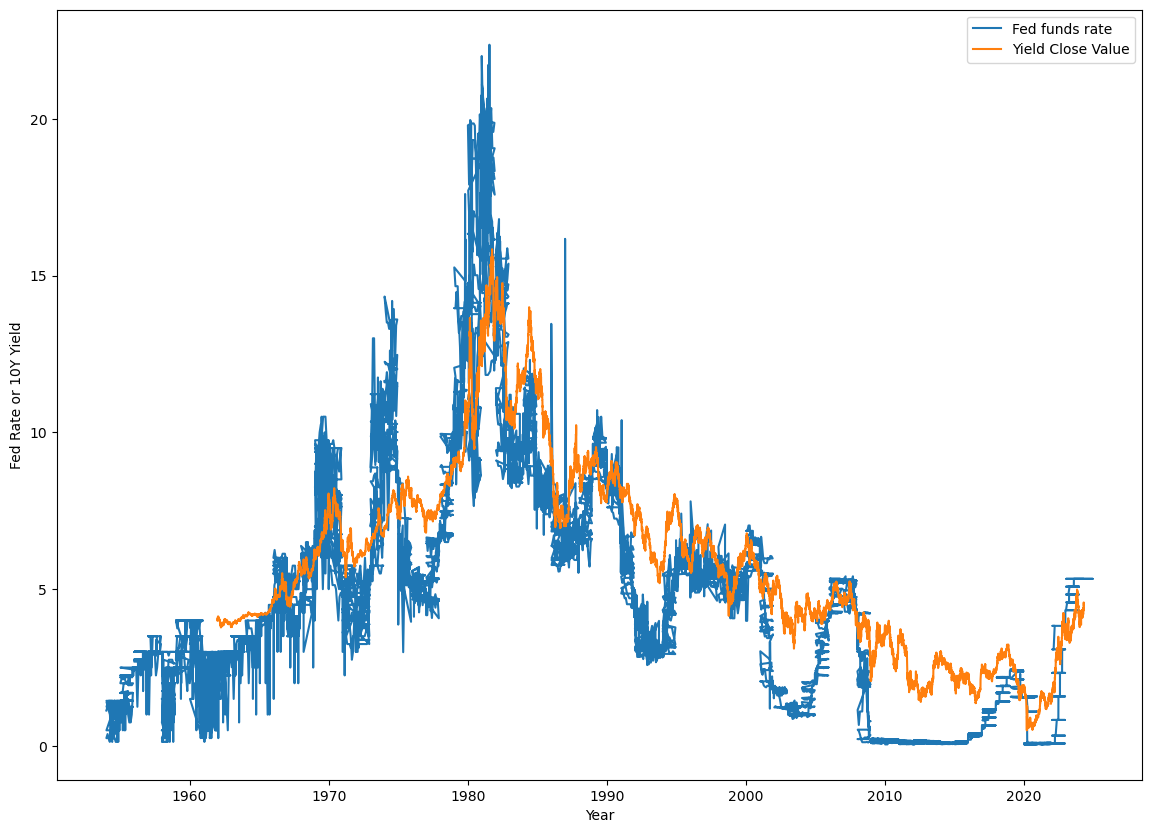

In [39]:
plt.figure(figsize = (14,10))
plt.plot(df_funds.index, df_funds[' value'].astype(float), label = 'Fed funds rate')
plt.plot(treasury_10yr_data.index, treasury_10yr_data['Close'], label = 'Yield Close Value')
plt.xlabel('Year')
plt.ylabel('Fed Rate or 10Y Yield')
plt.legend()
plt.show()

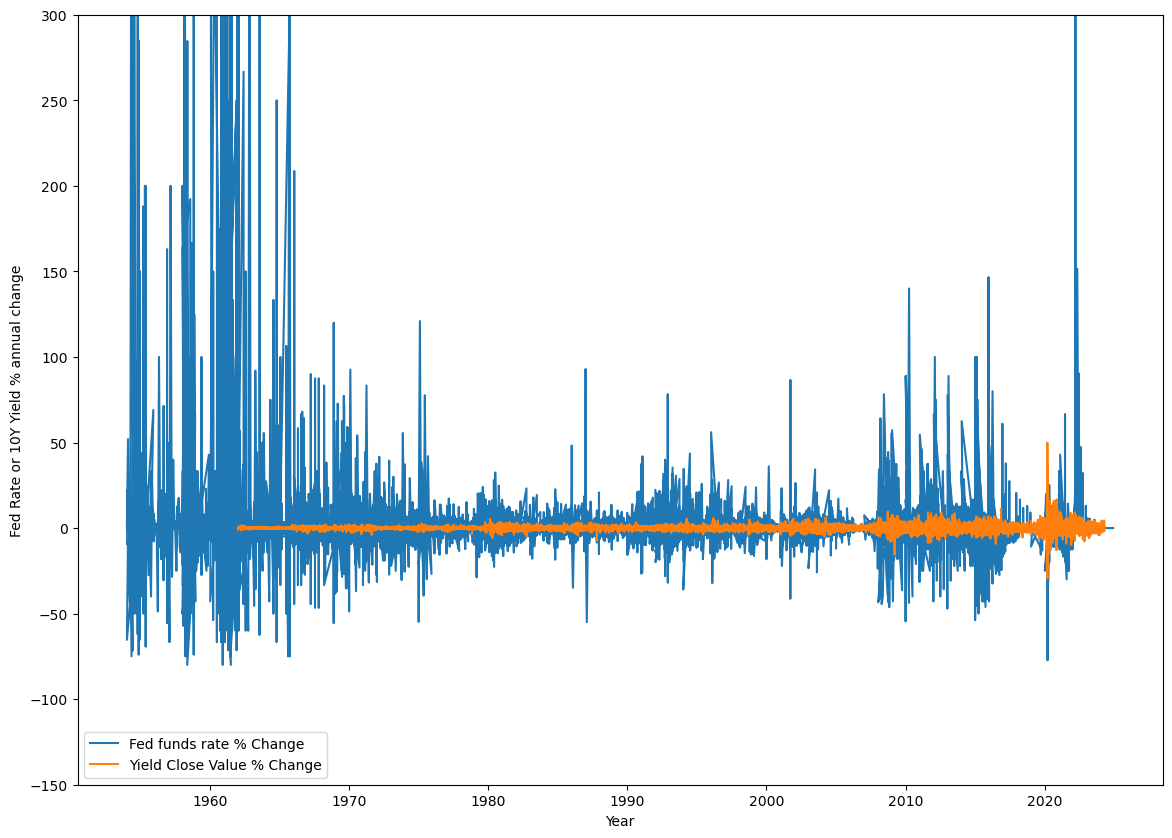

In [40]:

plt.figure(figsize = (14,10))
plt.plot(df_funds.index, df_funds['Pct_Change'].astype(float), label = 'Fed funds rate % Change')
plt.plot(treasury_10yr_data.index, treasury_10yr_data['Close_Pct_Change'], label = 'Yield Close Value % Change')
plt.ylim(-150,300)
plt.xlabel('Year')
plt.ylabel('Fed Rate or 10Y Yield % annual change')
plt.legend()
plt.show()

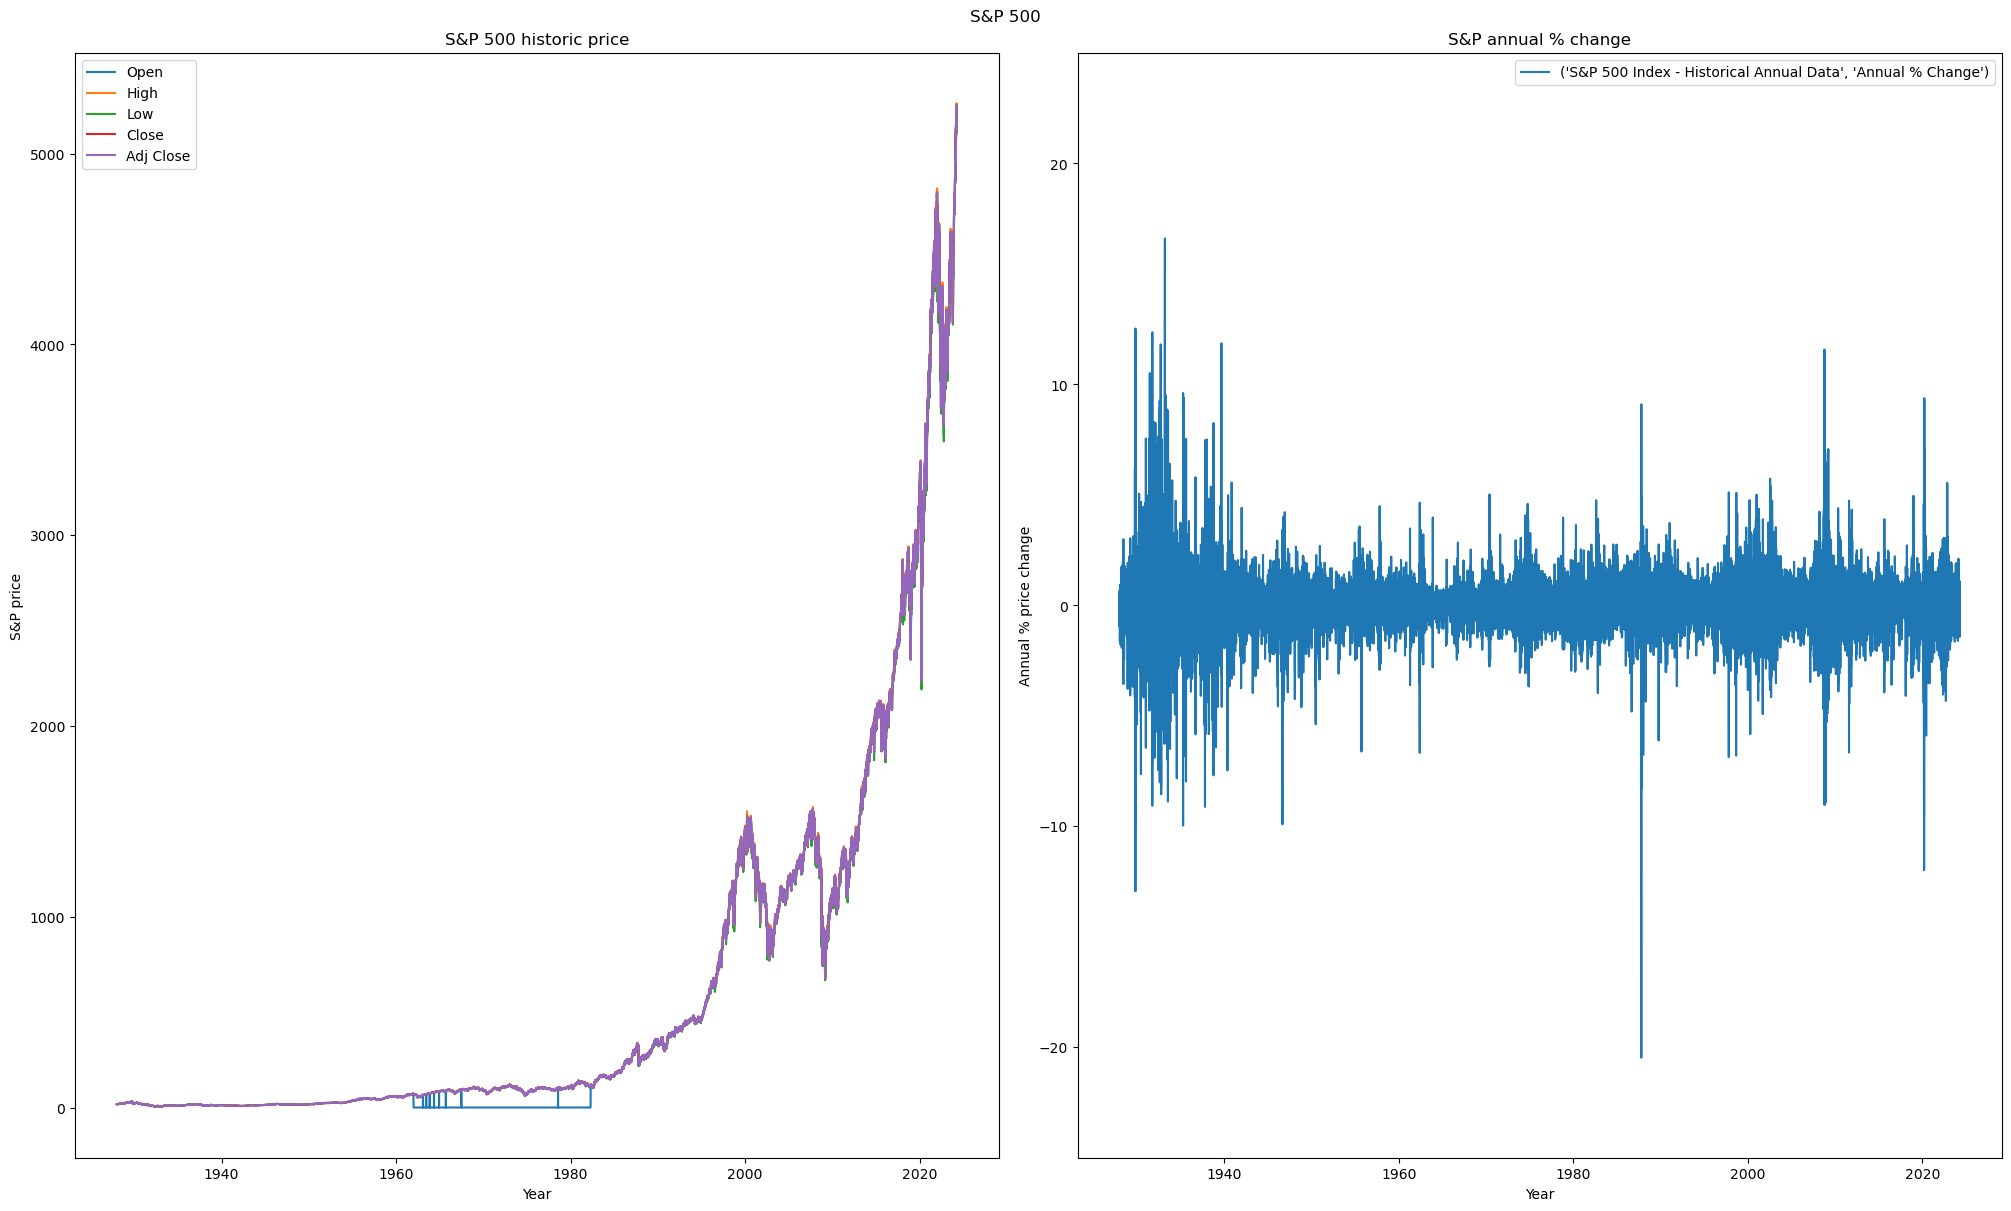

In [41]:
fig2, axs = plt.subplots(nrows = 1, ncols = 2, constrained_layout = True, figsize=(20,12))
(ax1, ax2) = axs
fig2.suptitle('S&P 500')

for col in sp500_data.columns: 
    if col == 'Close_Pct_Change' or col =='Volume':
        continue
    else:
        ax1.plot(sp500_data.index, sp500_data[col], label = col) 
        ax1.set_xlabel('Year')
        ax1.set_ylabel('S&P price')
        ax1.set_title('S&P 500 historic price')
        ax1.legend()

ax2.plot(sp500_data.index, sp500_data['Close_Pct_Change'], label = ('S&P 500 Index - Historical Annual Data', 'Annual % Change'))
ax2.set_title('S&P annual % change')
ax2.set_xlabel('Year')
ax2.set_ylabel('Annual % price change')
ax2.legend(loc = 'upper right')
ax2.set_ylim(-25,25)

plt.show()

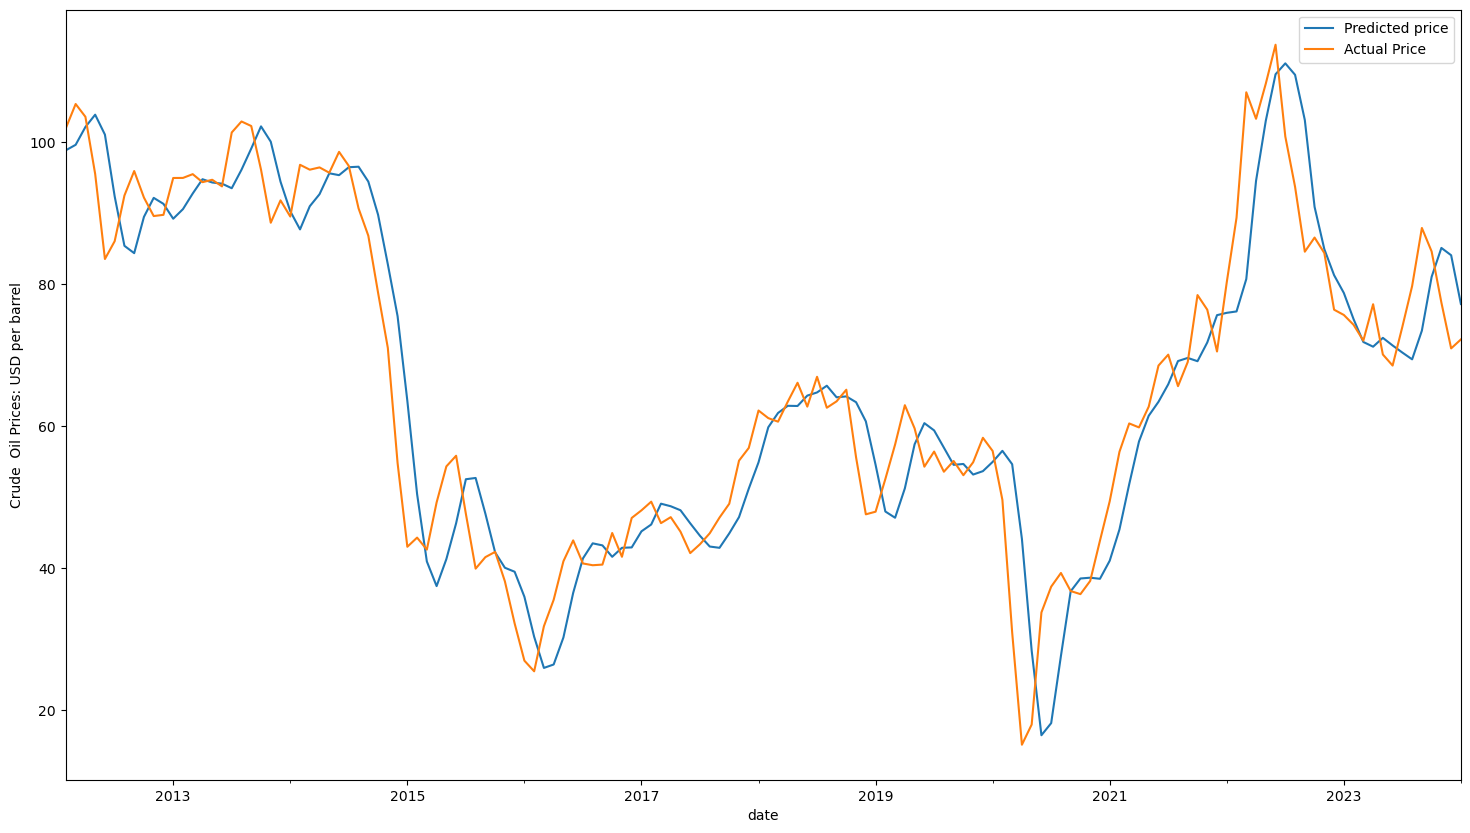

The model has a 87.147301% accuracy.


In [68]:
oil_price_df['date'] =  pd.to_datetime(oil_price_df.index, format='%Y-%m')
oil_price_df['MA3']= oil_price_df['USD per Barrel'].shift(1).rolling(window = 3).mean()
oil_price_df['MA9']= oil_price_df['USD per Barrel'].shift(1).rolling(window = 9).mean()
oil_price_df = oil_price_df.dropna()

x = oil_price_df[['MA3', 'MA9']]
y = oil_price_df['USD per Barrel']
training = 0.75
t = int(training*len(oil_price_df))
X_train = x[:t]
y_train = y[:t]

X_test = x[t:]
y_test = y[t:]

model = LinearRegression().fit(X_train, y_train)
predicted_price = model.predict(X_test)
predicted_price = pd.DataFrame(predicted_price, index = y_test.index, columns = ['Price'])
predicted_price.plot(figsize = (18, 10))
y_test.plot()
plt.legend(['Predicted price', 'Actual Price'])
plt.ylabel('Crude  Oil Prices: USD per barrel')
plt.show()

R_squared_score = model.score(x[t:], y[t:])*100
accuracy = ('{0:2f}'.format(R_squared_score))
print('The model has a '+ accuracy +'% accuracy.')

In [69]:
df_oil_cons__totals_new['Total world']=df_oil_cons__totals_new.sum(axis = 1)
df_oil_prod__totals_new['Total world'] = df_oil_prod__totals_new.sum(axis=1)
df_net_cons = pd.DataFrame(df_oil_prod__totals_new['Total world'] - df_oil_cons__totals_new['Total world'])

oil_price_avg = pd.DataFrame(oil_price_df_avg['Avg price'])
oil_price_avg.index = oil_price_avg.index.astype(int)

merged_df_oil_price = pd.merge(left=oil_price_avg, left_index=True,
                  right=df_net_cons, right_index=True,
                  how='inner')

merged_df_oil_price['MA3']= merged_df_oil_price['Avg price'].shift(1).rolling(window = 3).mean()
merged_df_oil_price['MA9']= merged_df_oil_price['Avg price'].shift(1).rolling(window = 9).mean()
merged_df_oil_price = merged_df_oil_price.dropna()

C:\Users\spyro\AppData\Local\Temp\ipykernel_79072\2136281105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oil_cons__totals_new['Total world']=df_oil_cons__totals_new.sum(axis = 1)
C:\Users\spyro\AppData\Local\Temp\ipykernel_79072\2136281105.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_oil_prod__totals_new['Total world'] = df_oil_prod__totals_new.sum(axis=1)


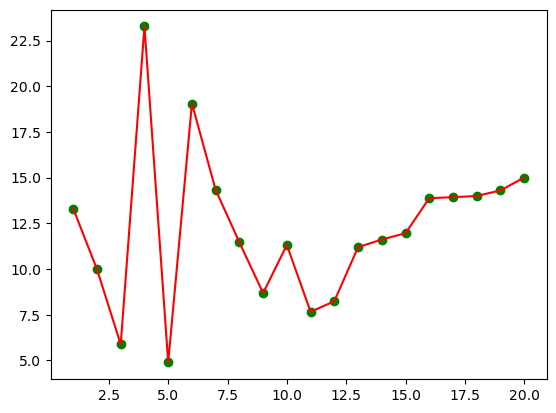

In [70]:
x_values = merged_df_oil_price[['MA3','MA9', 'Total world']].values
y_values = merged_df_oil_price['Avg price'].values


number_degrees = [1,2,3,4,5,6,7, 8, 9 , 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
plt_mean_squared_error = []
for degree in number_degrees:
   poly_model = PolynomialFeatures(degree=degree)
   poly_x_values = poly_model.fit_transform(x_values)
   poly_model.fit(poly_x_values, y_values)
  
   regression_model = LinearRegression()
   regression_model.fit(poly_x_values, y_values)
   y_pred = regression_model.predict(poly_x_values)
  
   plt_mean_squared_error.append(mean_squared_error(y_values, y_pred, squared=False))
  
plt.scatter(number_degrees,plt_mean_squared_error, color="green")
plt.plot(number_degrees,plt_mean_squared_error, color="red") 

In [80]:
degree=5
poly_model = PolynomialFeatures(degree=degree)
poly_x_values = poly_model.fit_transform(x_values)
poly_model.fit(poly_x_values, y_values)
regression_model = LinearRegression()
regression_model.fit(poly_x_values, y_values)
y_pred = regression_model.predict(poly_x_values)
regression_model.coef_
mean_squared_error(y_values, y_pred, squared=False)

4.890228594481929

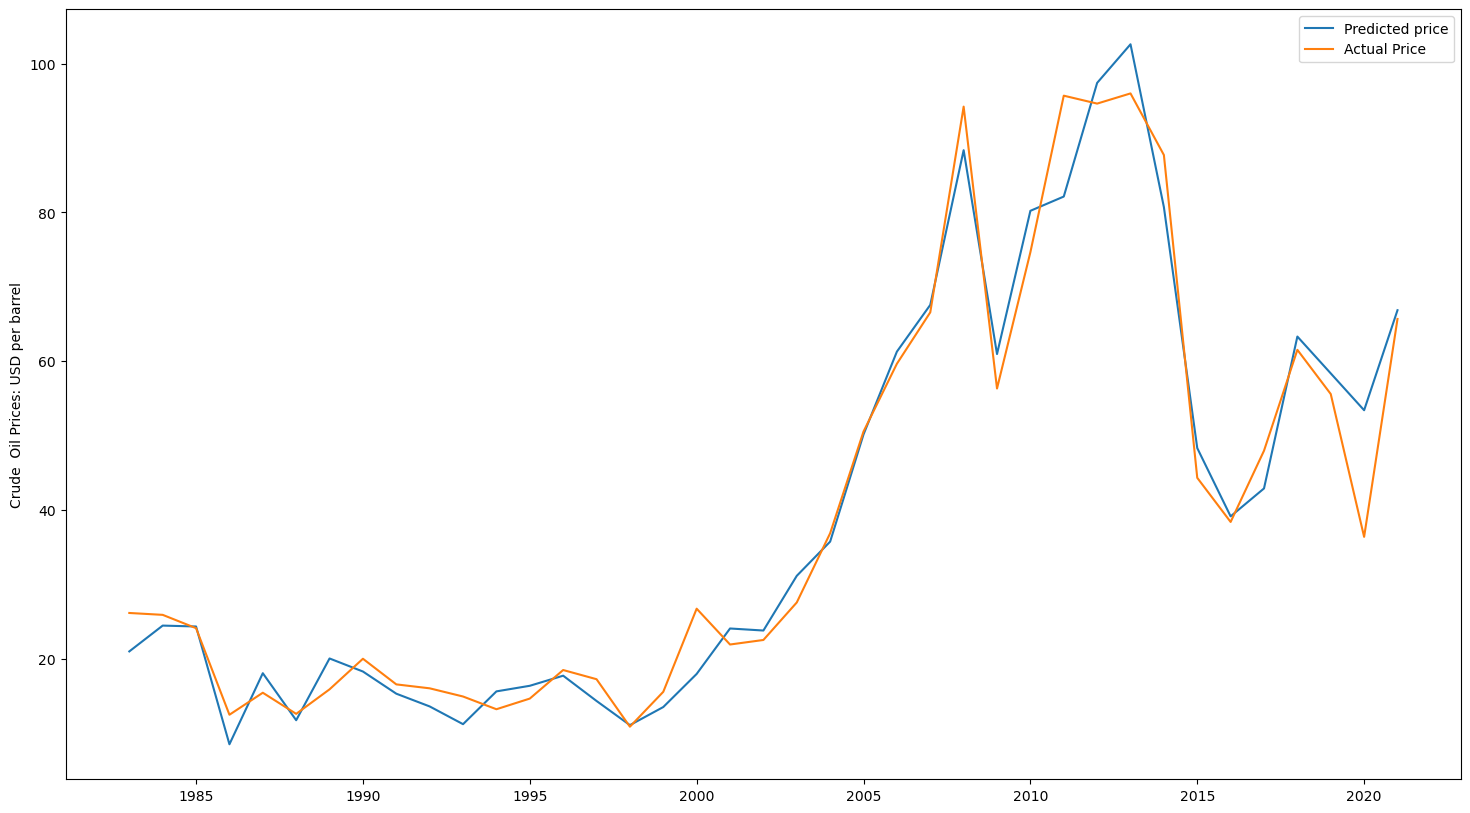

the model has a 96.765753% accuracy.


In [81]:
predictions = pd.DataFrame(data = y_pred,
                  index = merged_df_oil_price.index, 
                  columns = ['Predicted price'])
predictions.plot(figsize = (18, 10))
merged_df_oil_price['Avg price'].plot()
plt.legend(['Predicted price', 'Actual Price'])
plt.ylabel('Crude  Oil Prices: USD per barrel')
plt.show()

R_squared_score = regression_model.score(poly_x_values, y_values)*100
accuracy = ('{0:2f}'.format(R_squared_score))
print('the model has a '+ accuracy +'% accuracy.')

In [73]:
target_column = ['Avg price'] 
predictors = list(set(list(merged_df_oil_price.columns))-set(target_column))
merged_df_oil_price[predictors] = merged_df_oil_price[predictors]/merged_df_oil_price[predictors].max()
merged_df_oil_price.describe()

Avg price  Total world        MA3        MA9
count  39.000000    39.000000  39.000000  39.000000
mean   39.766453     8.647738   0.402830   0.437749
std    27.547554     3.801911   0.271356   0.293455
min    10.841667     1.000000   0.141190   0.185834
25%    16.266667     6.053072   0.178579   0.211919
50%    26.709167     7.799617   0.281164   0.265675
75%    57.980000    10.649971   0.585782   0.724299
max    95.995833    16.777890   1.000000   1.000000

In [74]:
X = merged_df_oil_price[predictors].values
y = merged_df_oil_price[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
dtree = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

dtree.fit(X_train, y_train)
pred_train_tree= dtree.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_tree)))
print(r2_score(y_train, pred_train_tree))

pred_test_tree= dtree.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_tree))) 
print(r2_score(y_test, pred_test_tree))

dtree1 = DecisionTreeRegressor(max_depth=2)
dtree2 = DecisionTreeRegressor(max_depth=5)
dtree1.fit(X_train, y_train)
dtree2.fit(X_train, y_train)

tr1 = dtree1.predict(X_train)
tr2 = dtree2.predict(X_train) 

y1 = dtree1.predict(X_test)
y2 = dtree2.predict(X_test) 

10.633060493324383
0.8358620542119635
18.878184020283342
0.561381513522266


In [75]:
print(np.sqrt(mean_squared_error(y_train,tr1))) 
print(r2_score(y_train, tr1))
print(np.sqrt(mean_squared_error(y_test,y1))) 
print(r2_score(y_test, y1)) 

9.709402314681787
0.8631397219647111
17.78050180687755
0.610906004513653


In [76]:
print(np.sqrt(mean_squared_error(y_train,tr2))) 
print(r2_score(y_train, tr2))
print(np.sqrt(mean_squared_error(y_test,y2))) 
print(r2_score(y_test, y2)) 

0.5723146268133212
0.9995244873056394
22.011782515451205
0.4036833605518214


In [77]:
model_rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=100)
model_rf.fit(X_train, y_train) 
pred_train_rf= model_rf.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rf)))
print(r2_score(y_train, pred_train_rf))

pred_test_rf = model_rf.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rf)))
print(r2_score(y_test, pred_test_rf))

C:\Users\spyro\AppData\Local\Temp\ipykernel_79072\2032328428.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(X_train, y_train)


5.2762067938700685
0.9595856086940857
17.768952736344154
0.6114113012309179


In [78]:
oil_price_df.set_index('date', inplace = True)
oil_price_df.drop(columns = ['MA3', 'MA9'], inplace = True)

C:\Users\spyro\AppData\Local\Temp\ipykernel_79072\1696911878.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oil_price_df.drop(columns = ['MA3', 'MA9'], inplace = True)


Epoch 1/20
380/380 - 3s - loss: 0.0021 - 3s/epoch - 7ms/step
Epoch 2/20
380/380 - 1s - loss: 0.0039 - 663ms/epoch - 2ms/step
Epoch 3/20
380/380 - 1s - loss: 0.0027 - 657ms/epoch - 2ms/step
Epoch 4/20
380/380 - 1s - loss: 0.0021 - 639ms/epoch - 2ms/step
Epoch 5/20
380/380 - 1s - loss: 0.0019 - 639ms/epoch - 2ms/step
Epoch 6/20
380/380 - 1s - loss: 0.0017 - 653ms/epoch - 2ms/step
Epoch 7/20
380/380 - 1s - loss: 0.0015 - 701ms/epoch - 2ms/step
Epoch 8/20
380/380 - 1s - loss: 0.0014 - 653ms/epoch - 2ms/step
Epoch 9/20
380/380 - 1s - loss: 0.0013 - 808ms/epoch - 2ms/step
Epoch 10/20
380/380 - 1s - loss: 0.0012 - 776ms/epoch - 2ms/step
Epoch 11/20
380/380 - 1s - loss: 0.0011 - 723ms/epoch - 2ms/step
Epoch 12/20
380/380 - 1s - loss: 9.9801e-04 - 632ms/epoch - 2ms/step
Epoch 13/20
380/380 - 1s - loss: 9.2395e-04 - 636ms/epoch - 2ms/step
Epoch 14/20
380/380 - 1s - loss: 8.6135e-04 - 816ms/epoch - 2ms/step
Epoch 15/20
380/380 - 1s - loss: 8.0874e-04 - 818ms/epoch - 2ms/step
Epoch 16/20
380/380 -

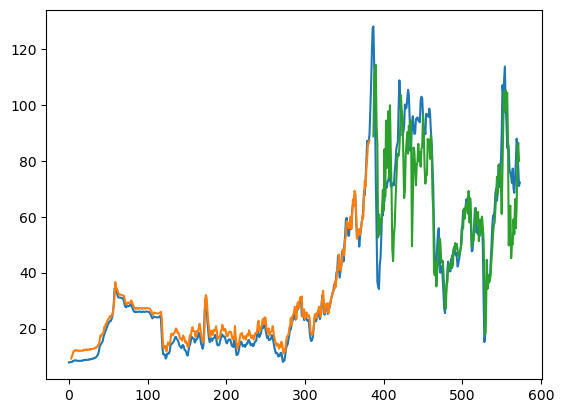

In [79]:

def create_dataset(dataset, look_back=1):
 dataX, dataY = [], []
 for i in range(len(dataset)-look_back-1):
  a = dataset[i:(i+look_back), 0]
  dataX.append(a)
  dataY.append(dataset[i + look_back, 0])
 return np.array(dataX), np.array(dataY)
np.random.seed(7)
dataset = oil_price_df.values
dataset = dataset.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
'''***********************************************'''
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
 model.fit(trainX, trainY, epochs=20, batch_size=batch_size, verbose=2, shuffle=False)
 model.reset_states()
    
'''**********************************************'''        
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
#calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [95]:
dxy.drop(['Volume'], axis = 1, inplace = True)
dxy['Avg']=dxy.mean(axis = 1)
dxy.set_index('Date', inplace = True)
dxy_new = pd.DataFrame(dxy['Avg'])
dxy_ready = pd.DataFrame(dxy.groupby(pd.PeriodIndex(dxy.index, freq="Y"))['Avg'].mean())
dxy_ready.index = dxy_ready.index.astype(str).astype(int)

C:\Users\spyro\AppData\Local\Temp\ipykernel_79072\1010307396.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dxy['Avg']=dxy.mean(axis = 1)


In [96]:
sp500_data = yf.download('^GSPC', period='max', interval='1d')
annual_sp500_data = sp500_data.resample('Y').last()
annual_sp500_data.reset_index(inplace = True)
annual_sp500_data['Year'] = annual_sp500_data['Date'].dt.year
annual_sp500_data.set_index('Year', inplace = True) 
df_sp_ready = pd.DataFrame(annual_sp500_data['Close'])
df_sp_ready.rename(columns={'Close': 'Close s&p 500'}, inplace = True)

[*********************100%%**********************]  1 of 1 completed


In [97]:
treasury_10yr_data = yf.download('^TNX', period='max', interval='1d')
annual_treasury_10yr_data = treasury_10yr_data.resample('Y').last()
annual_treasury_10yr_data.reset_index(inplace = True)
annual_treasury_10yr_data['Year'] = annual_treasury_10yr_data['Date'].dt.year
annual_treasury_10yr_data.set_index('Year', inplace = True) 
df_yield_ready = pd.DataFrame(annual_treasury_10yr_data['Close'])
df_yield_ready.rename(columns={'Close': 'Close yield'}, inplace = True)

[*********************100%%**********************]  1 of 1 completed


In [98]:
df_funds_ready= pd.read_csv(os.path.abspath('data/FEDFUNDS.csv'))
df_funds_ready.reset_index(inplace = True)
df_funds_ready['DATE'] = pd.to_datetime(df_funds_ready['DATE'])
df_funds_ready['Year'] =df_funds_ready['DATE'].dt.year
df_funds_ready.set_index('Year', inplace = True) 
df_funds_ready = pd.DataFrame(df_funds_ready['FEDFUNDS'])
df_funds_ready.rename(columns={'FEDFUNDS': 'FEDFUNDS RATE'}, inplace = True)

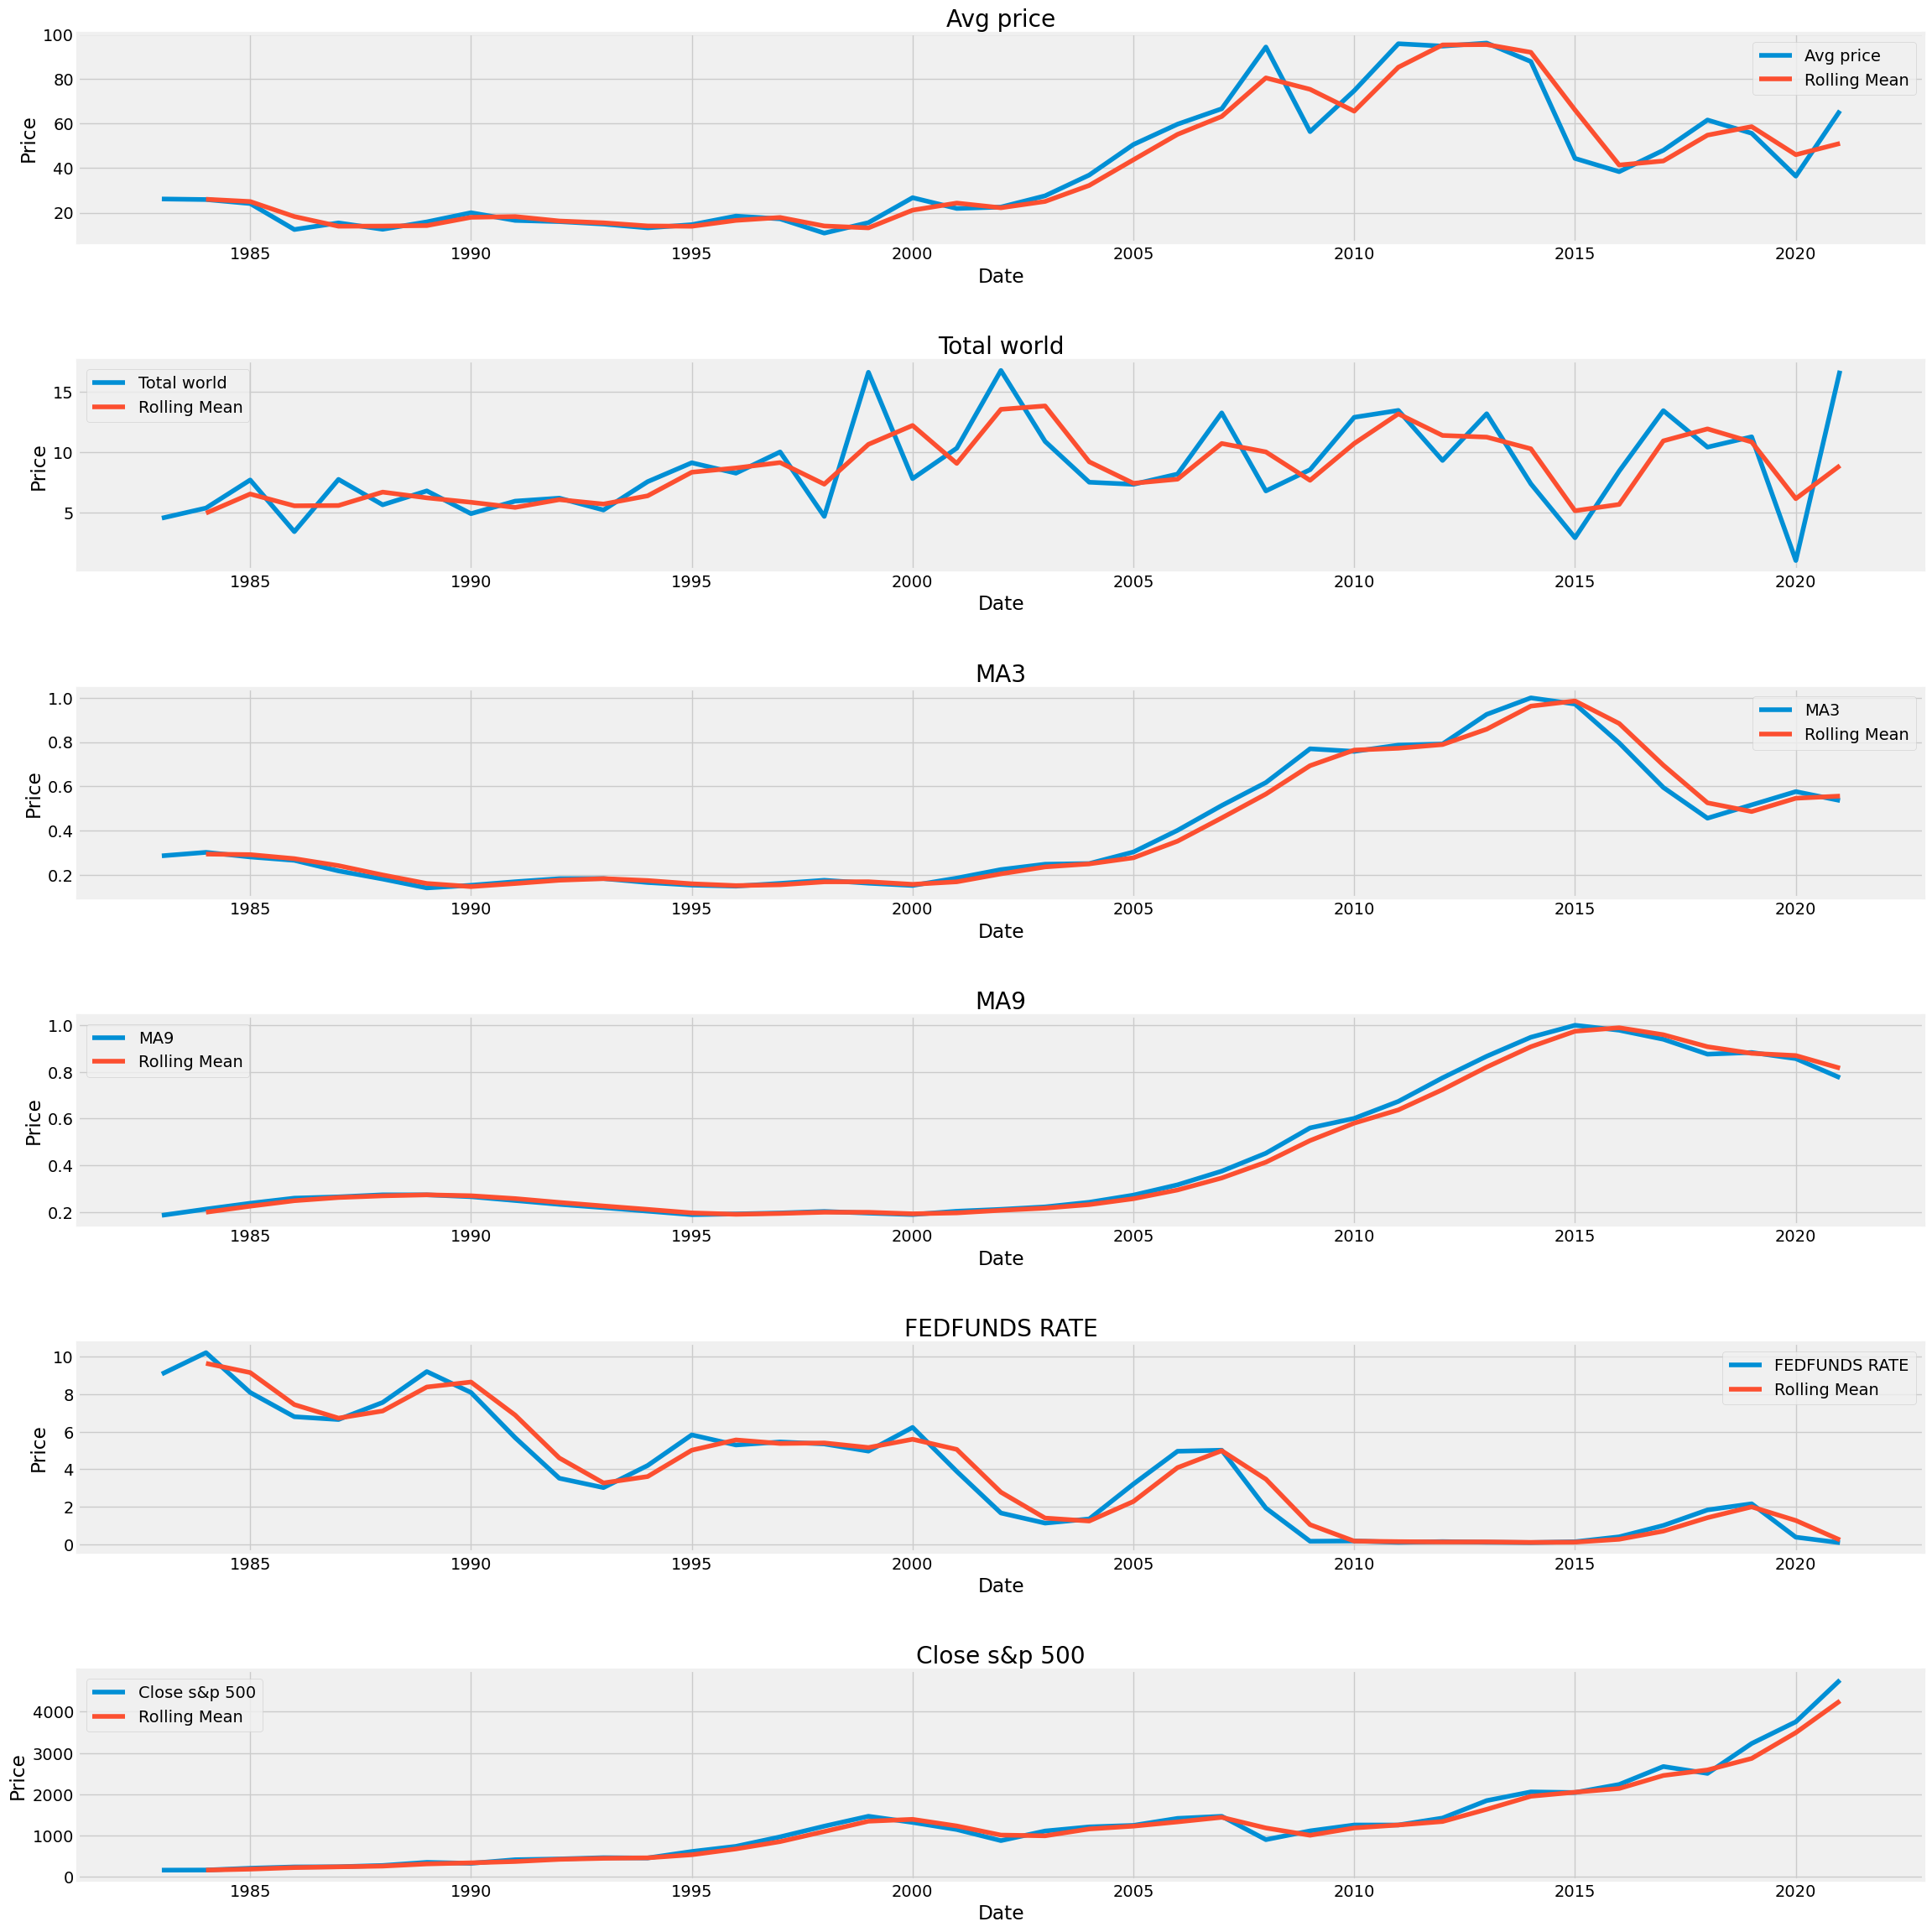

In [100]:
merged_df_ml = merged_df_oil_price.merge(df_funds_ready,
                  how='inner', left_index = True, right_index = True).merge(df_sp_ready, how = 'inner', left_index = True, right_index = True).merge(df_yield_ready, how = 'inner', left_index = True, right_index = True)
merged_df_ml.index = merged_df_ml.index.astype(int)
merged_df_ml = merged_df_ml.merge(dxy_ready, how = 'inner', right_index = True, left_index = True)
data = merged_df_ml
col_names = data.columns

fig = plt.figure(figsize=(24, 24))
plt.style.use('fivethirtyeight')
for i in range(6):
  ax = fig.add_subplot(6,1,i+1)
  ax.plot(data.iloc[:,i],label=col_names[i])
  data.iloc[:,i].rolling(2).mean().plot(label='Rolling Mean')
  ax.set_title(col_names[i])
  ax.set_xlabel('Date')
  ax.set_ylabel('Price')
  plt.legend()
fig.tight_layout(pad=3.0)
plt.show()
     

c:\Users\spyro\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\spyro\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\spyro\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

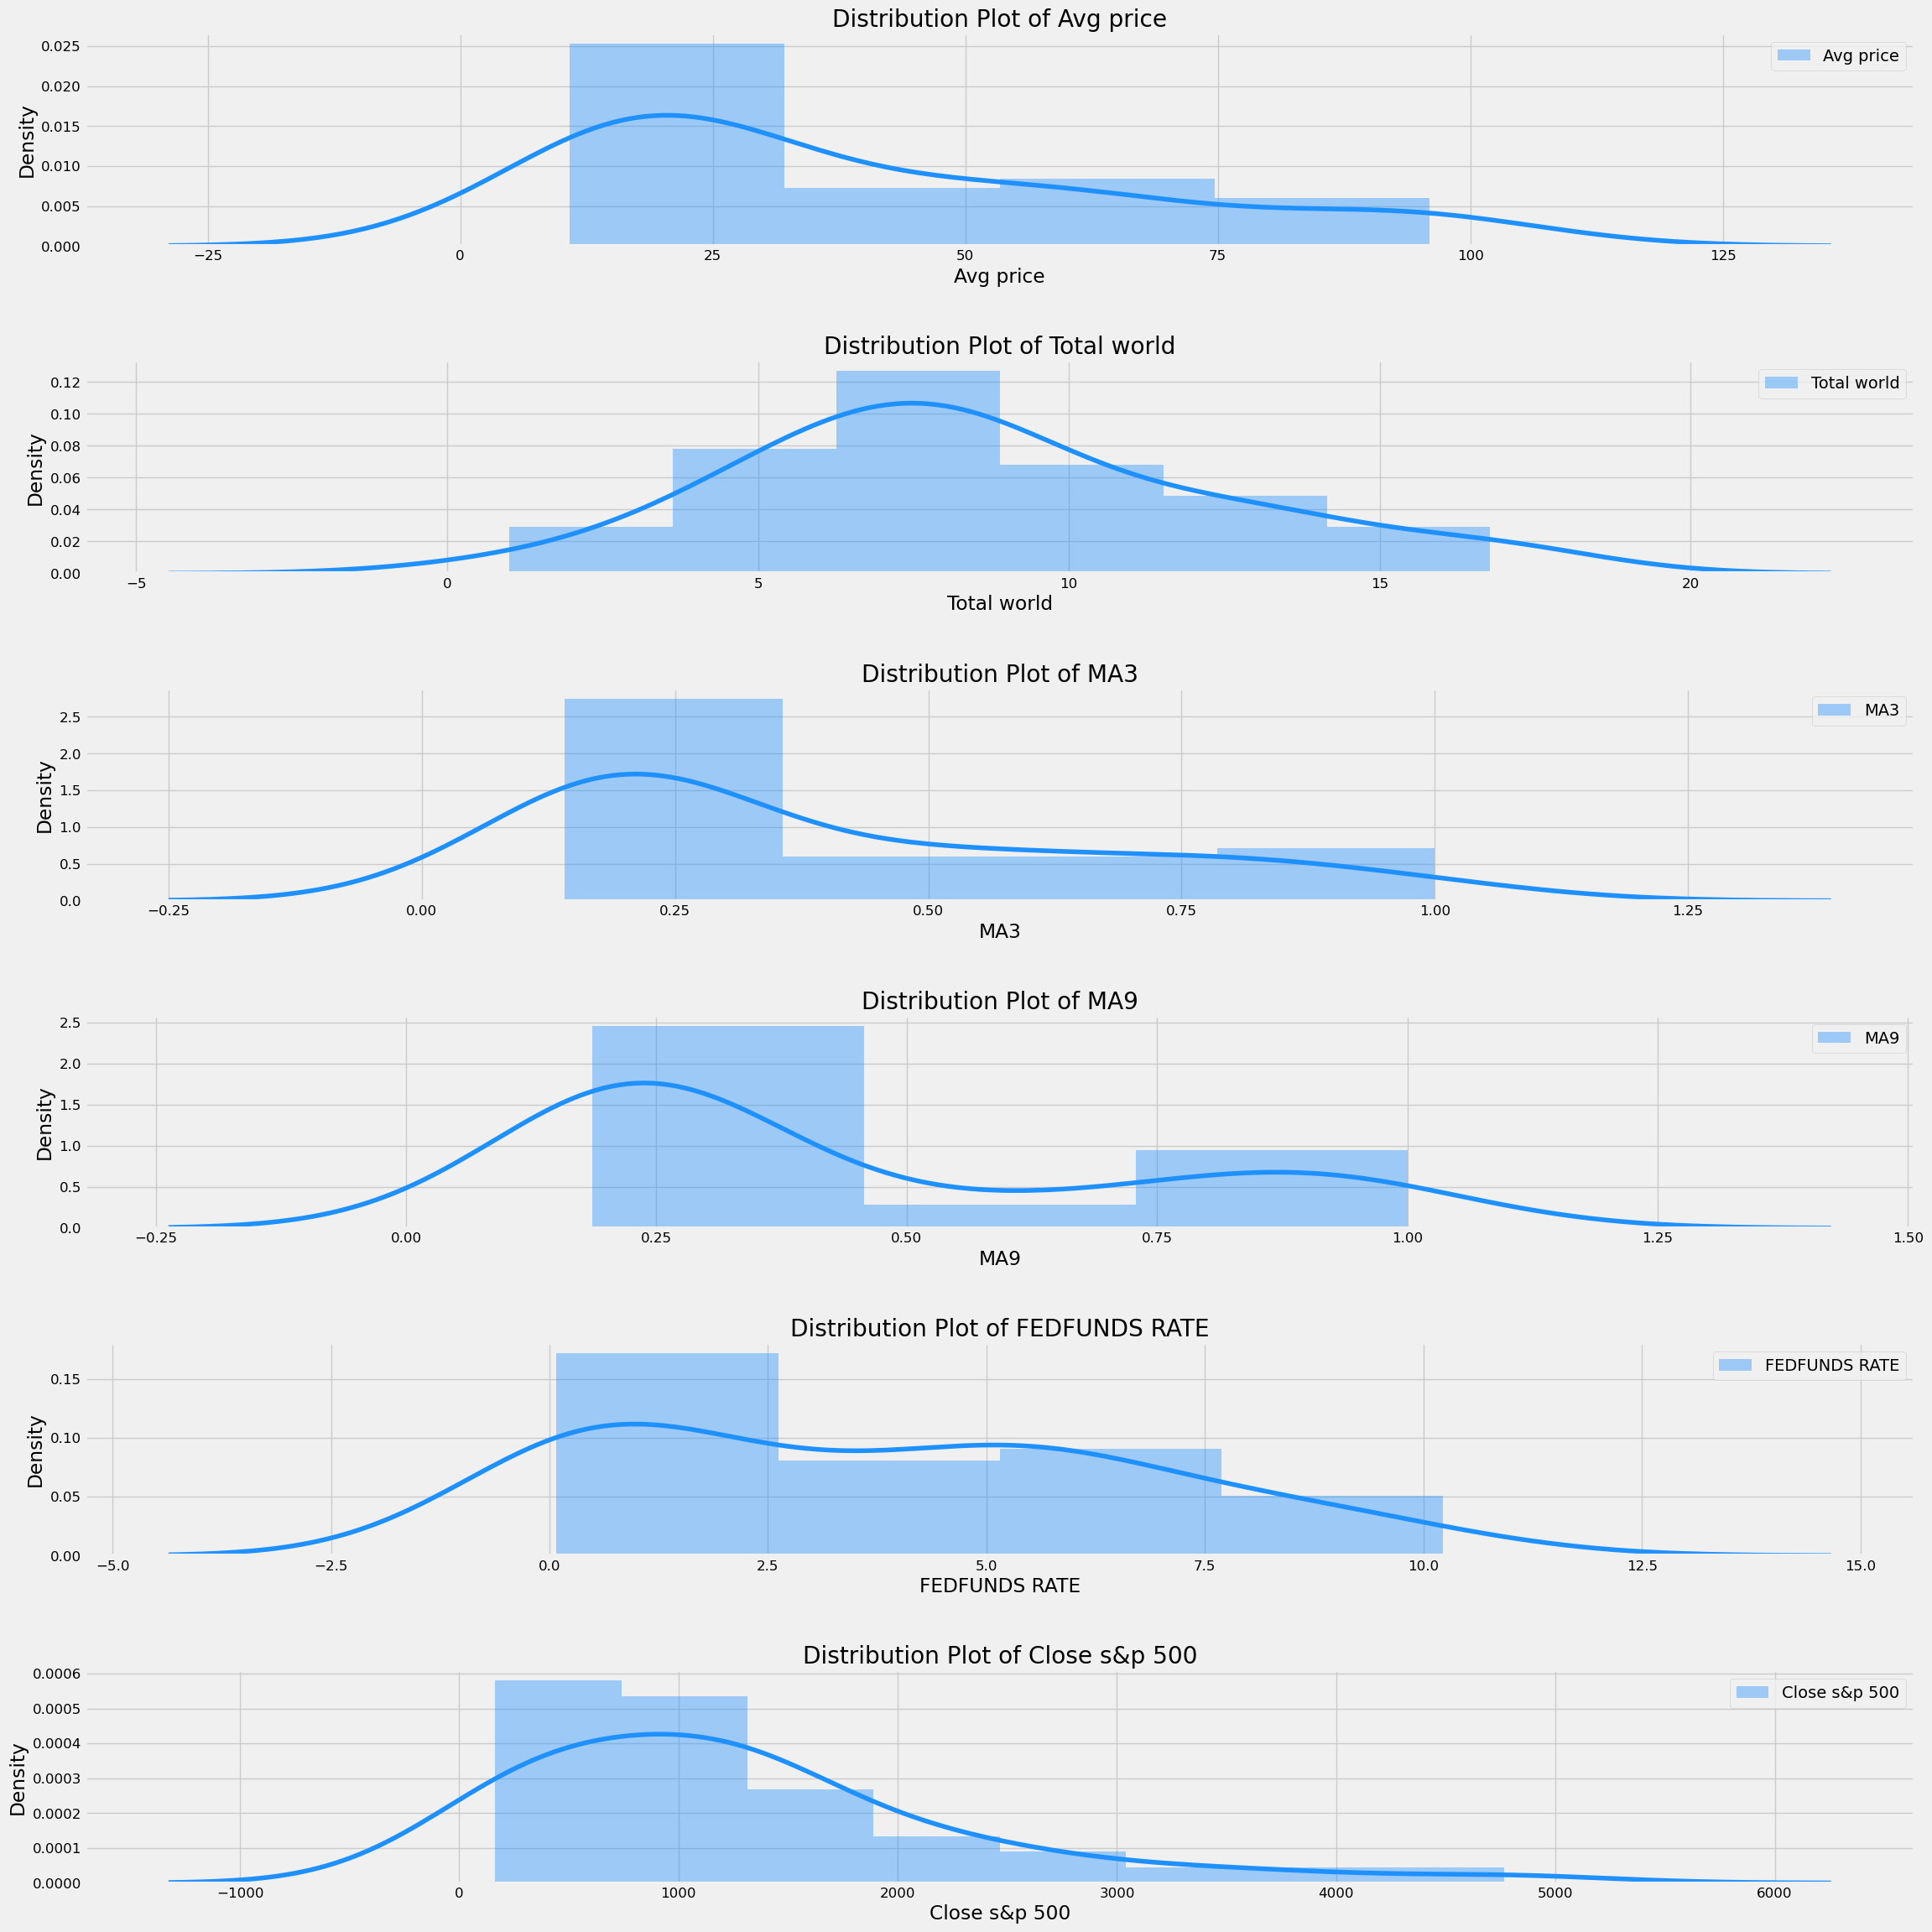

In [102]:
data = merged_df_ml
fig = plt.figure(figsize=(24, 24))
plt.style.use('fivethirtyeight')
col_names = data.columns
for i in range(6):
  ax = fig.add_subplot(6,1,i+1)
  sns.distplot(data.iloc[:,i],label=col_names[i],color='dodgerblue').set_title("Distribution Plot of {}".format(col_names[i]),axes=ax)
  ax.tick_params(labelsize=12)
  plt.legend()
fig.tight_layout(pad=3.0)
plt.show()

Text(0.5, 1.0, 'Box Plot Year Wise-WTI')

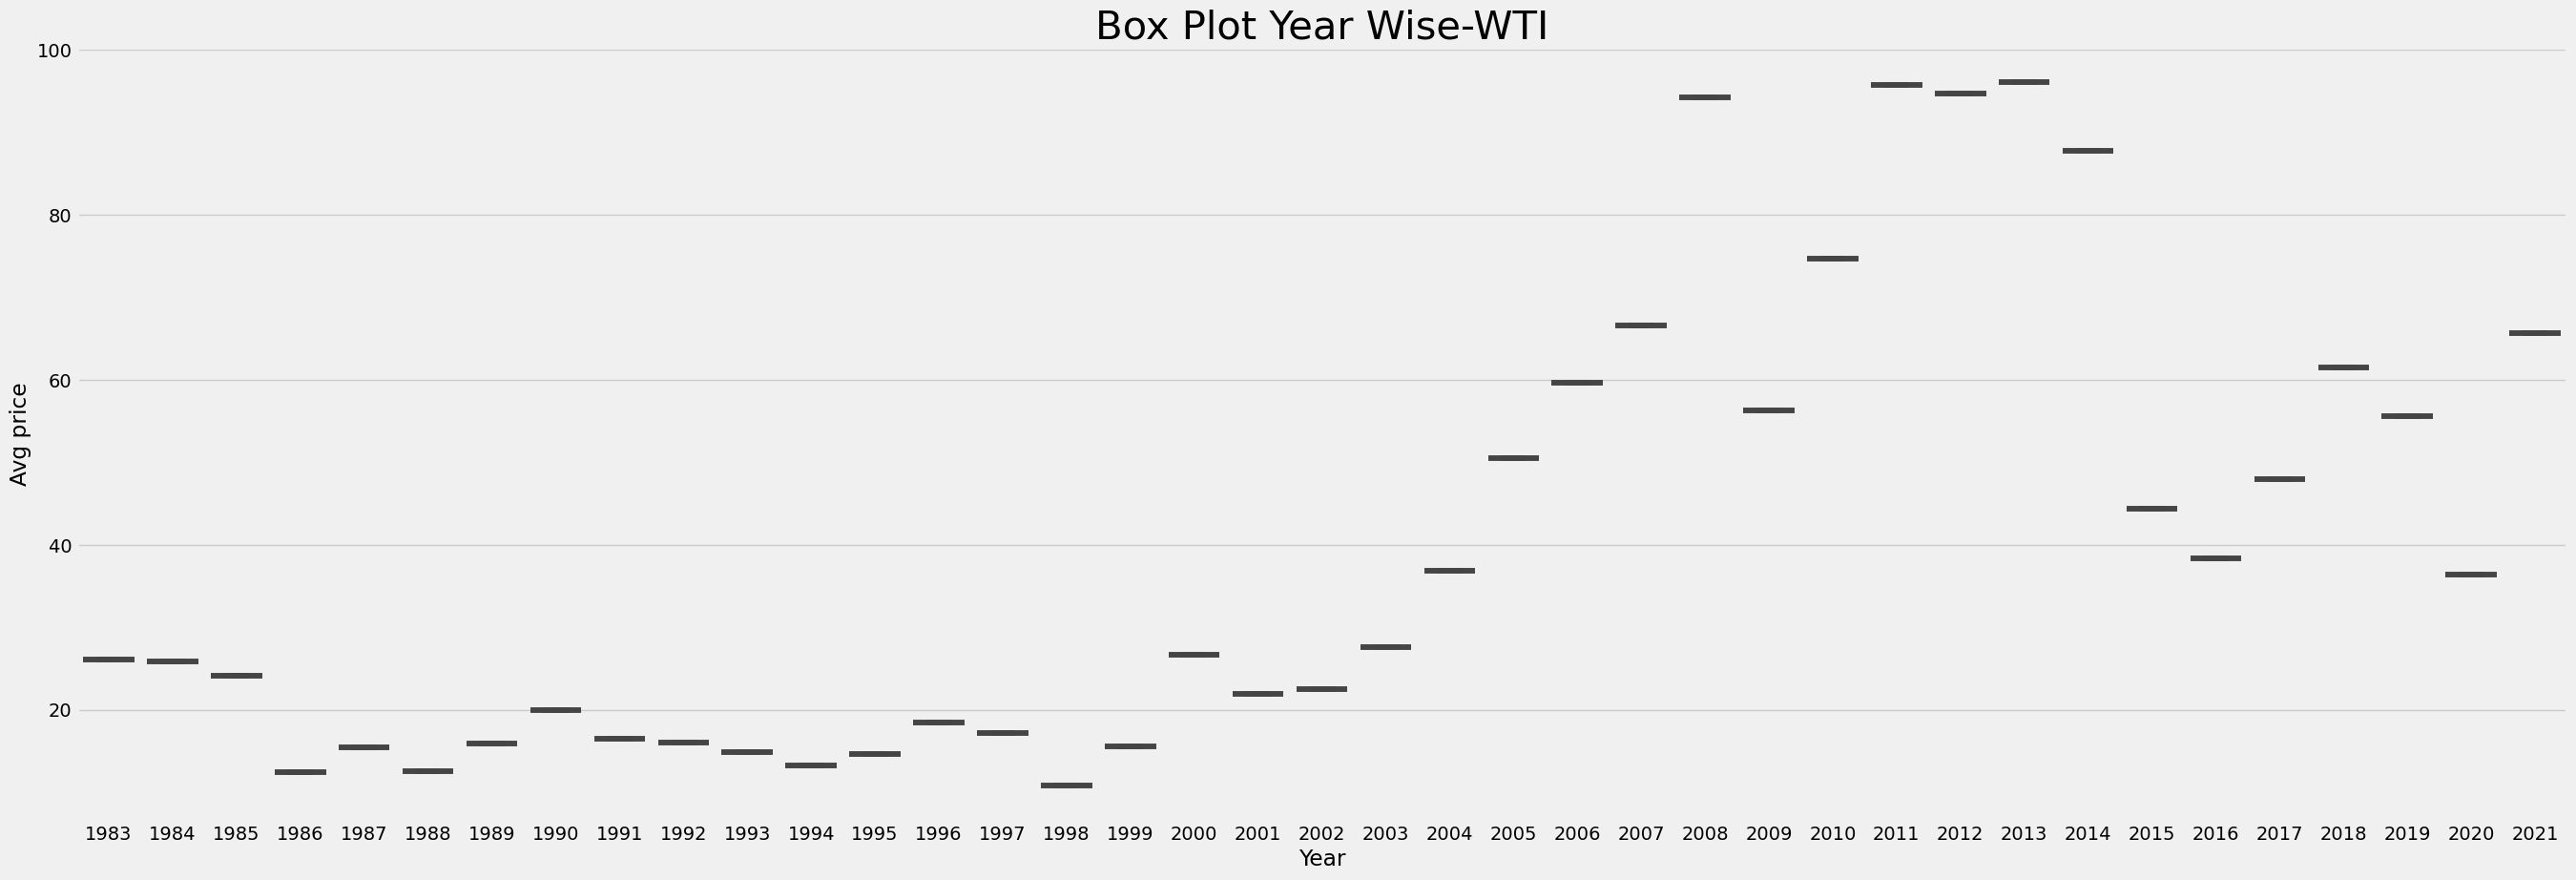

In [103]:
temp_data = merged_df_ml
temp_data['Year'] = merged_df_ml.index
plt.figure(figsize=(30,10))
ax = sns.boxplot(x=temp_data['Year'], y=temp_data['Avg price'])
ax.set_title('Box Plot Year Wise-WTI',fontsize=30)

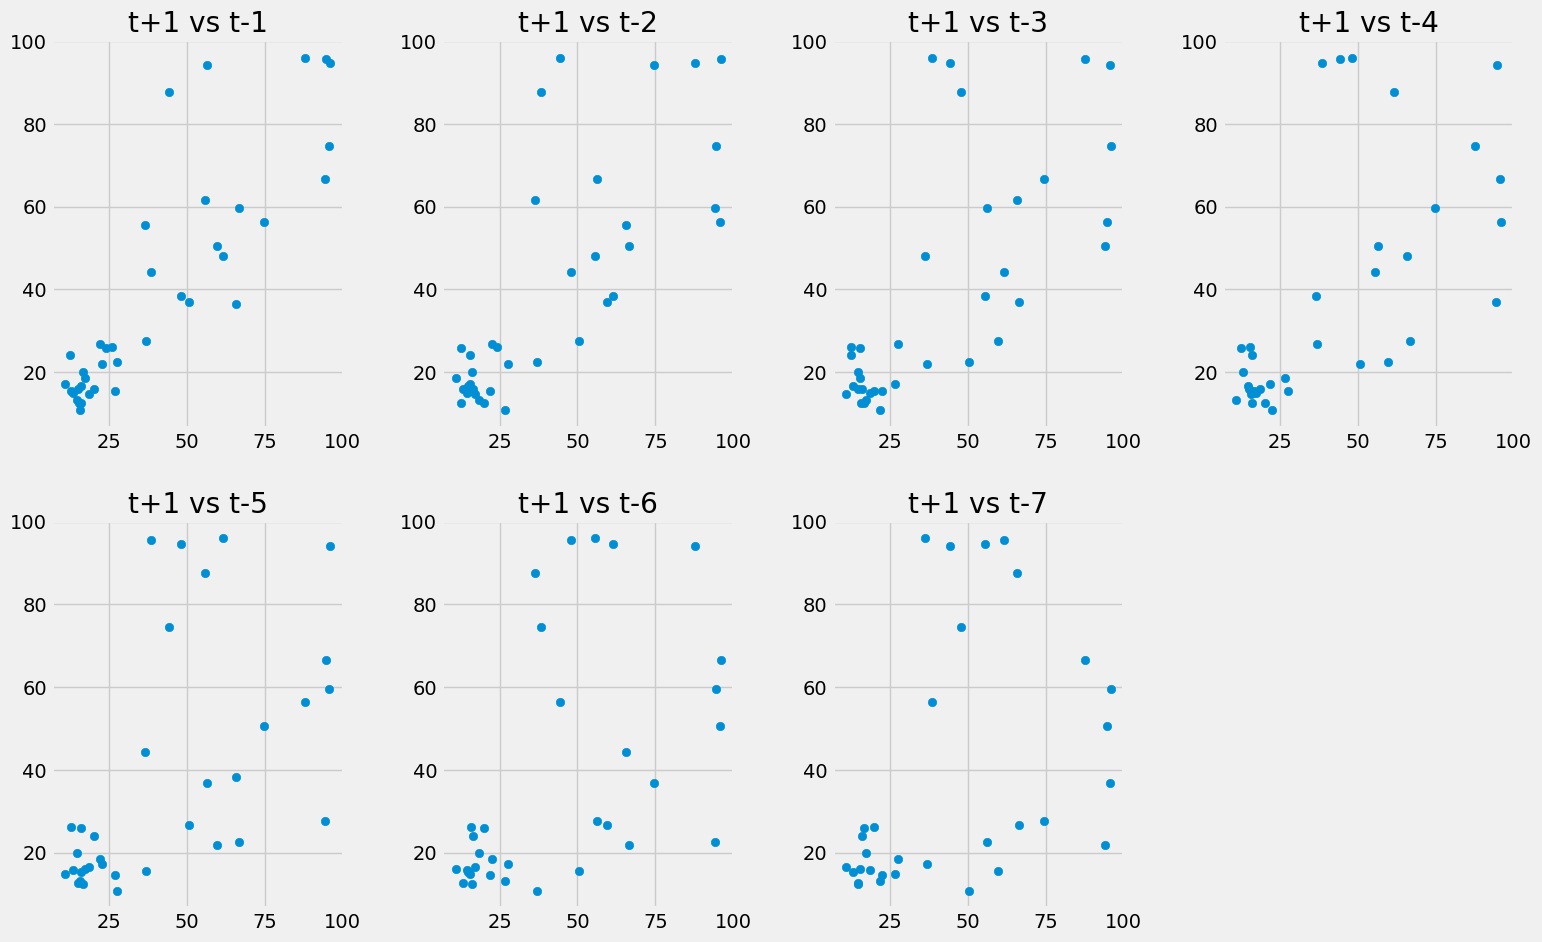

In [105]:
plt.figure(figsize=(16,10))
pd.plotting.lag_plot(merged_df_ml['Avg price'])
wti_series = merged_df_ml['Avg price']
n_lags = 7
cols = [wti_series]

for i in range(1,(n_lags + 1)):
	cols.append(wti_series.shift(i))
df = pd.concat(cols, axis=1)
cols = ['t+1']
for i in range(1,(n_lags + 1)):
	cols.append('t-' + str(i))
df.columns = cols
plt.figure(1)
for i in range(1,(n_lags + 1)):
	ax = plt.subplot(240 + i)
	ax.set_title('t+1 vs t-' + str(i))
	plt.scatter(x=df['t+1'].values, y=df['t-'+str(i)].values)
plt.tight_layout(pad=2)
plt.show()

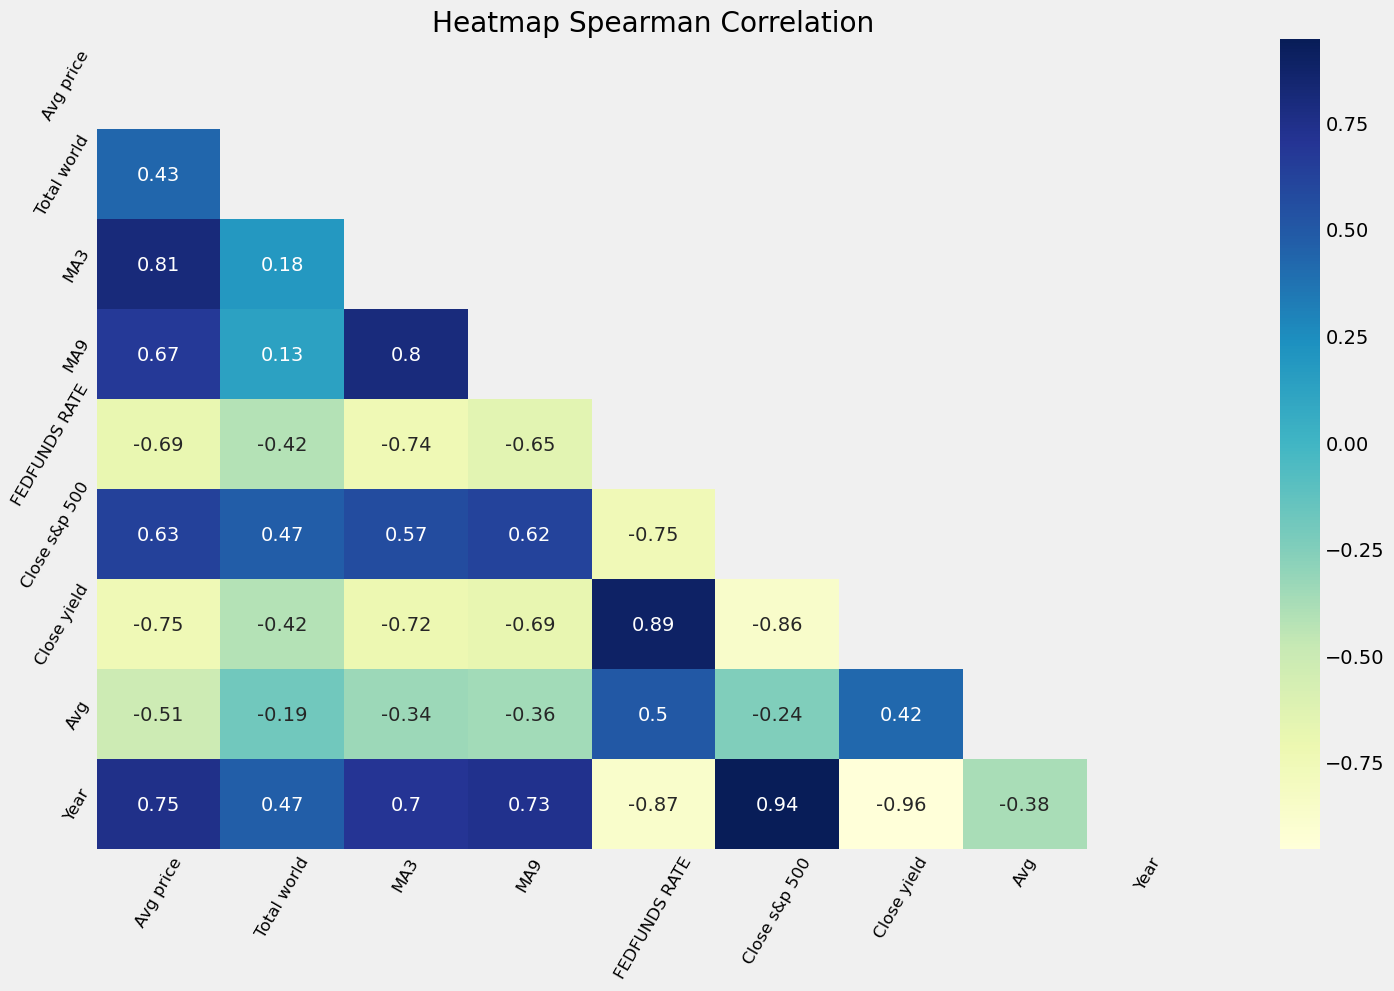

In [106]:
sc = MinMaxScaler(feature_range=(0,1))
oil_df_scaled= sc.fit_transform(merged_df_ml)
plt.figure(figsize=(16,10))
matrix = np.triu(merged_df_ml.corr(method='spearman'))
heat_map = sns.heatmap(merged_df_ml.corr(method='spearman'),annot=True,annot_kws={"size":14},cmap= 'YlGnBu',mask=matrix)
heat_map.set_yticklabels(heat_map.get_yticklabels(), rotation=60)
heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=60)
plt.tick_params(labelsize=12)
plt.title('Heatmap Spearman Correlation')
plt.style.use('fivethirtyeight')

In [107]:
merged_df_ml.corr(method='spearman')

Avg price  Total world       MA3       MA9  FEDFUNDS RATE  \
Avg price       1.000000     0.426316  0.810729  0.671053      -0.693927   
Total world     0.426316     1.000000  0.183806  0.132794      -0.418421   
MA3             0.810729     0.183806  1.000000  0.802834      -0.739879   
MA9             0.671053     0.132794  0.802834  1.000000      -0.649393   
FEDFUNDS RATE  -0.693927    -0.418421 -0.739879 -0.649393       1.000000   
Close s&p 500   0.631579     0.470850  0.567206  0.623887      -0.751215   
Close yield    -0.746559    -0.415587 -0.720040 -0.686842       0.887652   
Avg            -0.514575    -0.189676 -0.338664 -0.359109       0.500405   
Year            0.751215     0.465385  0.703644  0.733603      -0.867409   

               Close s&p 500  Close yield       Avg      Year  
Avg price           0.631579    -0.746559 -0.514575  0.751215  
Total world         0.470850    -0.415587 -0.189676  0.465385  
MA3                 0.567206    -0.720040 -0.338664  0.703644  
MA9                 0.623887    -0.686842 -0.359109  0.733603  
FEDFUNDS RATE      -0.751215     0.887652  0.500405 -0.867409  
Close s&p 500       1.000000    -0.862348 -0.243117  0.944939  
Close yield        -0.862348     1.000000  0.422470 -0.955466  
Avg                -0.243117     0.422470  1.000000 -0.380364  
Year                0.944939    -0.955466 -0.380364  1.000000

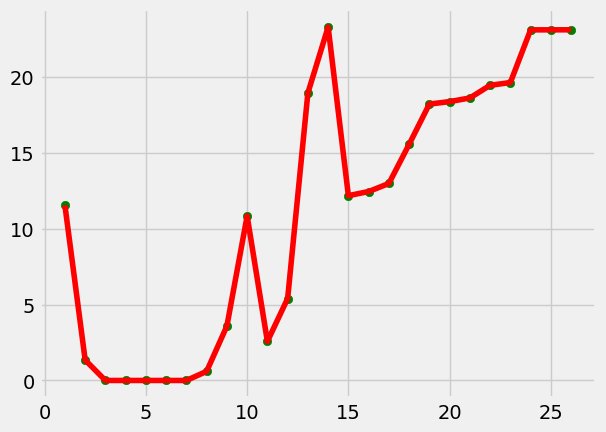

In [108]:
x_values = pd.DataFrame(merged_df_ml[['Total world','MA3', 'MA9', 'Avg', 'Close s&p 500', 'FEDFUNDS RATE', 'Close yield']]).values
y_values = merged_df_ml['Avg price'].values

number_degrees = [1,2,3,4,5,6,7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
plt_mean_squared_error = []
for degree in number_degrees:

   poly_model = PolynomialFeatures(degree=degree)
  
   poly_x_values = poly_model.fit_transform(x_values)
   poly_model.fit(poly_x_values, y_values)
  
   regression_model = LinearRegression()
   regression_model.fit(poly_x_values, y_values)
   y_predi = regression_model.predict(poly_x_values)
  
   plt_mean_squared_error.append(mean_squared_error(y_values, y_predi, squared=False))
  
plt.scatter(number_degrees,plt_mean_squared_error, color="green")
plt.plot(number_degrees,plt_mean_squared_error, color="red") 

In [109]:
degree=3
poly_model = PolynomialFeatures(degree=degree)
poly_x_values = poly_model.fit_transform(x_values)
poly_model.fit(poly_x_values, y_values)
regression_model = LinearRegression()
regression_model.fit(poly_x_values, y_values)
y_pred = regression_model.predict(poly_x_values)
regression_model.coef_
mean_squared_error(y_values, y_pred, squared=False)

1.0876536395786408e-08

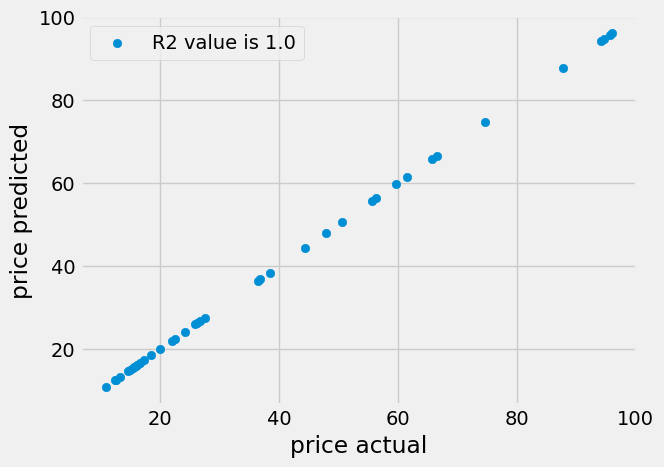

In [111]:
predictions = pd.DataFrame(data = y_pred,
                  index = merged_df_ml.index, 
                  columns = ['Predicted oil price'])
coefficient_of_dermination = r2_score(predictions['Predicted oil price'], merged_df_ml['Avg price'])
plt.scatter(predictions['Predicted oil price'], merged_df_ml['Avg price'], label = f'R2 value is {coefficient_of_dermination}')
plt.legend()
plt.ylabel('price predicted')
plt.xlabel('price actual')
plt.show()